# 2 자연어와 단어의 분산 표현

## 자연어 처리란?

우리의 말을 컴퓨터에게 이해시키기 위한 기술

## Thesaurus

thesauras란 기본적으로 유의어 사전으로, '뜻이 같은 단어(동의어)', '뜻이 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있습니다.

또한 자연어 처리에 이용되는 thesaurus에서는 단어 사이의 '상위와 하위' 혹은 '천제와 부분'등, 더 세세한 관계가지 정의해둔 경우가 있습니다.

그 중 자연어 처리 분야에서 가장 유명한 thesaurus는 WordNet이다. 

<img src="deep_learning_2_images/fig 2-2.png" width="50%" height="20%" />    

### Thesaurus의 문제점

    * 시대 변화에 대응하기 어렵다.
    
    * 사람을 쓰는 비용이 크다.
    
    * 단어의 미묘한 차이를 표현할 수 없다.
    
## 통계 기반 기법

대량의 텍스트 데이터인 Copus를 이용한다. 

통계 기반 기법의 목표는 문장을 쓰는 방법, 단어를 선택하는 방법, 단어의 의미 등 사람이 알고 있는 자연어에 대한 지식이 포함되어 있는 corpus를 

이용하여 사람의 지식이 가득한 corpus에서 자동으로, 효율적으로 그 핵심을 추출하는 것이다.

### 파이썬으로 corpus 전처리하기

텍스트 데이터를 단어롤 분할하고 그 분할된 단어들을 단어 ID 목록으로 변환하는 것이다.

In [1]:
import numpy as np
text = 'You say goodbye and I say hello.'
text = text.lower()
text = text.replace('.', ' .')
print (text)

words = text.split(' ')
print (words)

word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word
        
print (id_to_word)        
print (word_to_id)

you say goodbye and i say hello .
['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [2]:
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
print (corpus)

[0 1 2 3 4 1 5 6]


In [3]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    
    word_to_id = {}
    id_to_word = {}
    
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [5]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

### 단어의 분산 표현

단어의 분산 표현은 단어를 고정 길이의 밀집벡터(dense vector)로 표현하는 것을 말한다. 밀집 벡터라 함은 대부분의 원소가 0이 아닌 실수인 벡터를 말한다.

### 분포 가설

자연어에 관한 대부분의 연구는 '단어의 의미는 주변 단어에 의해 형성된다'라는 아이디어에 기반한다. 이를 __분포 가설__이라고 한다. 

단어 자체에는 의미가 없고, 그 단어가 사용된 '맥락'이 의미를 형성한다는 것이다. 

<img src="deep_learning_2_images/fig 2-3.png" width="50%" height="20%" />   

### 동시발생 행렬



In [6]:
import sys 
sys.path.append('..')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print (corpus)
# [0 1 2 3 4 1 5 6]

print (id_to_word)
# {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


<img src="deep_learning_2_images/fig 2-6.png" width="50%" height="20%" />   

In [7]:
def create_co_matrix(corpus, vacab_size, window_size=1):
    corpus_size=len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_wor_id] += 1
                
            if right_idx < corpus_size:
                right_word_idx = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    return co_matrix

In [8]:
co_matrix = np.zeros((3, 3), dtype=np.int32)
    
for idx, word_id in enumerate(corpus):
    print ('idx :', idx, 'word_id :', word_id)

idx : 0 word_id : 0
idx : 1 word_id : 1
idx : 2 word_id : 2
idx : 3 word_id : 3
idx : 4 word_id : 4
idx : 5 word_id : 1
idx : 6 word_id : 5
idx : 7 word_id : 6


<img src="deep_learning_2_images/fig 2-7.png" width="50%" height="20%" />   

### 벡터 간 유사도

벡터 사이의 유사도를 측정하는 방법은 다양하다. 대표적으로 벡터의 내적이나 유클리드 거리 등이 있다. 

단어 벡터의 유사도를 나타낼 때는 __코사인 유사도(cosine similarity)__를 자주 이용한다. 

두 벡터 $\textbf {x} = (x_1, x_2, x_3, \cdots, x_n)$ 과 $\textbf {y} = (y_1, y_2, y_3, \cdots, y_n)$ 이 있다면, 코사인 유사도는 다음 식으로 정의된다.

$$ similarity\textbf {(x, y)} = {\textbf{x} \cdot \textbf{y} \over \|\textbf{x}\| \|\textbf{y}\|} = {x_1y_1 + \cdots + x_ny_n \over \sqrt{x_1^2+\cdots+x_n^2} \sqrt{y_1^2+\cdots+y_n^2}}$$

직관적으로 풀어보면 '두 벡터가 가리키는 방향이 얼마나 비슷한가?'이다. 두 벡터의 방향이 완전히 같다면 코사인 유사도가 1이 되며, 완전히 반대라면 -1이 된다.

In [35]:
# 1e-8을 더해주는 이유는 0으로 나누는 것을 방지하기 위함이다.
# 이 정도 작은 값이면 일반적으로 부동소수점 계산 시 '반올림'되어 다른 값에 '흡수'됩니다. 
# 이 값이 벡터의 노름에 '흡수'되기 때문에 대부분의 경우 eps를 더한다고 해서 최종 계산 결과에는 영향을 주지 않는다.
def cos_similarity(x, y, eps=1e-8):
    nx = x / np.sqrt(np.sum(x**2) + eps) # x의 정규화
    ny = y / np.sqrt(np.sum(y**2) + eps) # y의 정규화
    return np.dot(nx, ny)

In [18]:
import sys 
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # "you"의 단어 벡터
c1 = C[word_to_id['i']] # "i"의 단어 벡터
print (cos_similarity(c0, c1))
# .7071067691154799

0.7071067691154799


In [21]:
print (corpus)
print (id_to_word)
print (word_to_id)


[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [17]:
def most_similarity(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1. 검색어를 꺼낸다.
    if query not in word_to_id:
        print ("'{0}'(을)를 찾을 수 없습니다.".format(query))
        return
    
    print ('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2. 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vacab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3. 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print ("'{0}': '{1}'".format(id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return

In [24]:
# argsort() 설명 
# 오름차순으로 정렬해서 인덱스를 반환한다.
# 내림차순으로 정렬하고 싶으면 -를 곱하고 argsort()를 해준다.
x = np.array([100, -20, 2])
print (x.argsort())

print ((-x).argsort())



[1 2 0]
[0 2 1]


In [26]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


##  통계 기반 기법 개선하기

### 상호정보량

동시발생 행렬의 원소는 두 단어가 동시에 발생한 횟수를 나타낸다. 그러나 이것은 좋은 특징이 아니다.

그래서 __점별 상호정보량(Pointwise Mutual Information, PMI)__라는 척도를 사용하자.

PMI는 확률변수 x와 y에 대해 다음 식으로 정의된다.

$$ \textbf{PMI}(x,y)  = \log_2{P(x,y) \over P(x)P(y)}$$

동시발생 행렬을 사용하여 위의 식을 다시 나타내자. 

C는 동시발생 행렬, $C(x,y)$는 단어$x$와 단어$y$가 동시발생하는 횟수, $C(x)$와 $C(y)$는 각각 단어 $x$와 $y$의 등장 횟수, $N$은corpus에 포함된 단어 수

$$ \textbf{PMI}(x,y)  = \log_2{P(x,y) \over P(x)P(y)} = \log_2{{C(x,y) \over N} \over {C(x) \over N}{C(y) \over N}} = \log_2{C(x,y)\cdot N \over C(x)C(y)}$$

그러나 두 단어의 동시발생 횟수가 0이면 $\log_2{0} = -\infty$가 된다.

그래서 실제로는 __양의 상호정보량(Positive PMI)__를 사용한다.

$$\textbf{PPMI}(x,y) = max(0,\textbf{PMI}(x,y))$$

이 식에 따라 PMI가 음수일 때는 0으로 취급한다. 

__<질문>__

근데 왜 로그 밑이 2일까??

In [9]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum()
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            # 로그값이 음의 무한대가 되는 것을 방지하기 위해 작은 값을 더했다.
            pmi = np.log2(c[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbos:
                
                cnt += 1
                if cnt % (total//100) == 0:
                    print ("'{0}'.1% 완료".format(100*cnt/total))
                    
    return 

In [10]:
import sys 
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print ('동시발생')
print (C)
print ('-'*50)
print ('PPMI')
print (W)


동시발생
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


위의 행렬을 보면 원소 대부분이 0인 것을 알 수있다. 벡터의 원소 대부분이 중요하지 않다는 뜻이다. 다르게 표현하면 각 원소의 '중요도'가 낮다는 뜻이다. 이런 벡터는 노이즈에 약하고 견고하지 못하다는 단점이 있다. 

이 문제를 해결하기 위해 __차원 감소__기법이 있다.

### 차원 감소

'중요한 정보'는 최대한 유지하면서 줄이는게 핵심이다. 직관적으로 데이터의 분포를 고려해 중요한 '축'을 찾는다. 

<img src="deep_learning_2_images/fig 2-8.png" width="50%" height="20%" />   

__<NOTE>__
    
    차원 감소의 결과로 원래의 sparse vector는 원소 대부분이 0이 아닌 값으로 구성된 '밀집벡터'로 변환된다. 이 조밀한 벡터야말로 우리가 원하는 단어의 분산 표현이다. 
    
차원 감소시키는 여러 방법 중, __특잇값분해(Singular Value Decomposition, SVD)__를 알아보자!    

SVD는 임의의 행렬을 세 행렬의 곱으로 분해하며, 수식으로는 다음과 같다.

$$ \textbf{X}=\textbf{USV}^T \qquad{\textbf{U}, \textbf{V} : orthogonal\, matrix, \textbf{S} : diagonal\, matrix}$$

행렬 __S__에서 특잇값이 작다면 중요도가 낮다는 뜻이므로 __S__, __U__, __V__의 일부분만 가져와 원래 행렬 __X__에 근사시킬 수 있다.

<img src="deep_learning_2_images/fig 2-9.png" width="50%" height="20%" />  

에서

<img src="deep_learning_2_images/fig 2-10.png" width="50%" height="20%" />   

### SVD에 의한 차원 감소

동시발생 행렬을 만들어 PPMI행렬로 변환한 다음 SVD를 적용해보자.

In [44]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [45]:
print (C[0])
print (W[0])
print (U[0]) 

# 밀집벡터의 차원을 2차원으로 감소시키는 방법
print (U[0,:2])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01 -9.323e-01  0.000e+00
 -1.800e-16]
[ 3.409e-01 -1.110e-16]


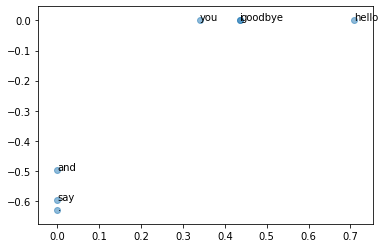

In [46]:
# 시각화
# 책에 의하면 goodbye와 hello, you와 i가 가까이 있다는 왜 그러지...?
for word, word_to_id in word_to_id.items():
    plt.annotate(word, (U[word_to_id, 0], U[word_to_id, 1]))
    
plt.scatter(U[:,0], U[:,1], alpha=.5)    
plt.show()

### PTB 데이터셋

PTB corpus는 주로 주어진 기법의 성능을 측정하는 벤치마크로 자주 이용된다.

PTB corpus에서는 한 문장이 하나의 줄로 저장되어 있다. 


이 책에서는 각 문장을 연결한 '하나의 큰 시계열 데이터'로 취급한다. 이때 각 문장 끝에 <eos>라는 특수문자를 삽입한다?? 무슨 말이지?

In [47]:
import sys
sys.path.append('..')
from dataset import ptb

# train용으로 데이터를 사용하겠다는 뜻
corpus, word_to_id, id_to_word = ptb.load_data('train')

print ('말뭉치 크기 : ', len(corpus))
print ('corpus[:30] : ', corpus[:30])
print ()
print ('id_to_word[0] : ', id_to_word[0])
print ('id_to_word[1] : ', id_to_word[1])
print ('id_to_word[2] : ', id_to_word[2])
print ()
print ("word_to_id['car'] : ", word_to_id['car'])
print ("word_to_id['happy'] : ", word_to_id['happy'])
print ("word_to_id['lexus'] : ", word_to_id['lexus'])

Done
말뭉치 크기 :  929589
corpus[:30] :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0] :  aer
id_to_word[1] :  banknote
id_to_word[2] :  berlitz

word_to_id['car'] :  3856
word_to_id['happy'] :  4428
word_to_id['lexus'] :  7426


### PTB 데이터셋 평가

고속 SVD를 이용하여 PTB 데이터셋에 통계 기반 기법을 적용해보자.

In [11]:
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print ('동시발생 수 계산...')
C = create_co_matrix(corpus, vocab_size, window_size)
print ('PPMI 계산...')
W = ppmi(C, verbose=True)

print ('SVD 계산...')
try:
    #truncated SVD 빠름
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                            random_state=None)
    
except ImportError:
    # SVD 느림
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, wordvec_size]    

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vec, top=5)

동시발생 수 계산...
PPMI 계산...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
SVD 계산...


IndexError: index 100 is out of bounds for axis 1 with size 100

## 이번 장에서 배운 내용

    * WordNet 등의 thesaurus를 이용하며 유의어를 얻거나 단어 사이의 유사도를 측정하는등 유용한 작업을 할 수 있다.
    
    * thesaurus 기반 기법은 thesaurus를 작성하는 데 엄청난 인적 자원이 든다거나 새로운 단어에 대응하기 어렵다는 문제가 있다.
    
    * 현재는 corpus(말뭉치)를 이용해 단어를 벡터화하는 방식이 주로 쓰인다.
    
    * 최근의 단어 벡터화 기법들은 대부분 '단어의 의미는 주변 단어에 의해 형성된다'는 분포 가설에 기초한다.
    
    * 통계 기반 기법은 말뭉치 안의 각 단어에 대해서 그 단어의 주변 단어의 빈도를 집계한다(동시발생 행렬).
    
    * 동시발생 행렬을 PPMI 행렬로 변환하고 다시 차원을 감소시킴으로써, 거대한 '희소벡터'를 작은 '밀집벡터'로 변호나할 수 있다.
    
    * 단어의 벡터 공간에서는 의미가 가까운 단어는 그 거리도 가까울 것으로 기대된다.

# Word2vec

앞 장에서는 '통계 기반 기법'으로 단어의 분산 표현을 얻었는데, 이번 장에서는 더 강력한 기법인 '추론 기반 기법'을 배워보자!

word2vec을 구현하여 추론 기반 기법을 배워보자!

## 추론 기반 기법과 신경망

단어를 벡터로 표현하는 방법 중 크게 2가지가 있다. 통계 기반과 추론 기반이다.

이번 절에선 통계 기반의 문제점을 지적하고 추론 기반을 알아보자.

후에 word2vec의 전처리를 위해 신경망으로 '단어'를 처리하는 예를 보자.

### 통계 기반 기법의 문제점

SVD의 계산 복잡도는 $O(n^3)$이므로 대규모 corpus를 다룰 때 상당한 병목현상을 일으킨다.  

### 추론 기반 기법 개요

맥락이 주어졌을 때 어떤 단어가 들어갈지를 추측하는 것이다. 말 그대로 '추론'하는 것이다.

<img src="deep_learning_2_images/fig 3-2.png" width="50%" height="20%"> 

어떤 추론 모델에 맥락이 이력되면 각 단어의 출현 확률을 출력한다.

<img src="deep_learning_2_images/fig 3-3.png" width="50%" height="20%" /> 

### 신경망에서의 단어 처리

기본적으로 '고정 길이 벡터'로 표현을 해야 한다. 그래서 보통 원핫벡터로 변환시킨다.

<img src="deep_learning_2_images/fig 3-4.png" width="50%" height="20%" /> 

다음은 원핫표현으로 된 단어 하나를 완전연결계층을 통해 변환하는 과정이다

<img src="deep_learning_2_images/fig 3-7.png" width="50%" height="20%" /> 

In [ ]:
import numpy as np
c = np.array([1,0,0,0,0,0,0])
W = np.random.randn(7,3)
h = np.matmul(c, W)
print (h)

그러나 실제로 원핫벡터와 가중치행렬의 연산을 들여다 보면 가중치행렬에서 행벡터 하나를 뽑아낸 것과 같다.

그 과정을 다음 장에서 word2vec의 속도 개선하는 방법으로 사용하겠다.

## 단순한 word2vec

이번 절에서 사용할 신경망모델은 word2vec에서 제안하는 CBOW(Continuous bag of words)모델이다.

### CBOW 모델의 추론 처리

CBOW모델은 맥ㄺ으로부터 타깃을 추측하는 용도의 신경망이다.

그래서 CBOW 모델이 가능한 한 정확하게 추론하도록 훈련시켜서 단어으이 분산 표현을 얻어내야 한다.

다음은 CBOW 모델의 신경망 구조이다.

<img src="deep_learning_2_images/fig 3-9.png" width="50%" height="20%" /> 

여기서 은닉층에 주목하자.

입력층이 2개가 있는 것을 볼 수 있다. 어떤 값을 은닉층의 값으로 써야 할 지 생각을 해줘야 한다.

이때 각 입력층의 출력값을 평균내서 은닉층의 값으로 사용한다.

그리고 입력층의 가중치행렬 $\textbf{W}_{in}$이 단어의 분산표현이다.

다음의 그림이 계층관점에서 본 CBOW모델의 구조이다.

<img src="deep_learning_2_images/fig 3-11.png" width="50%" height="20%" /> 

In [13]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul

# 샘플 맥락 데이터
c0 = np.array([1,0,0,0,0,0,0])
c1 = np.array([0,0,1,0,0,0,0])

# 가중치 초기화
W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = .5 * (h0+h1)
s = out_layer.forward(h)

print (s)


[-0.055  1.04  -0.731  0.302  0.085  0.638  1.138]


### CBOW 모델의 학습

출력층에서 각 단어의 점수를 출력했다. 이 값에 소프트맥스 함수를 적용하면 확률값을 얻을 수 있다.

<img src="deep_learning_2_images/fig 3-12.png" width="50%" height="20%" /> 

이 신경망을 학습하기 위해서 소프트맥스 함수와 교차엔트로피 오차를 이용한다.

<img src="deep_learning_2_images/fig 3-14.png" width="50%" height="20%" /> 

### word2vec의 가중치와 분산 표현

word2vec에는 두 가지의 가중치가 있다. 완전연결계층의 가중치$\textbf(W)_{in}$과 출력 측 완전연결계층의 가중치$\textbf(W)_{out}$이다.

입력 측 가중치의 각 행이 각 단어의 분산 표현이고 출력 측 가중치에도 단어의 의미가 인코딩된 벡터각 저장되고 있다고 생각할 수 있다.

<img src="deep_learning_2_images/fig 3-15.png" width="50%" height="20%" /> 

그럼 어떤 가중치를 단어의 분산 표현으로 사용할까?

    1. 입력 측의 가중치만 이용한다.
    
    2. 출력 측의 가중치만 이용한다.
    
    3. 양쪽 가중치 모두 이용한다.
    
word2vec(특히 skip-gram 모델)에서는 1이 대중적이다.

* word2vec과 유사한 GloVe에서는 두 가중치를 더한 값을 사용한다.

## 학습 데이터 준비

예시로 'You say goodby ans I say hello.'라는 문장을 사용한다.

### 맥락과 타깃

먼저 preprocess()함수를 이용하여 corpus를 단어 ID로 변환해주자.

다음 사진과 같이 만들어주는 create_contexts_target()함수를 만들어주자.

<img src="deep_learning_2_images/fig 3-16.png" width="50%" height="20%" /> 

<img src="deep_learning_2_images/fig 3-17.png" width="50%" height="20%" /> 

In [22]:
import sys
sys.path.append('..')
from common.util import preprocess

text = 'You say goodby ans I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print (corpus)
print (id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodby', 3: 'ans', 4: 'i', 5: 'hello', 6: '.'}


In [18]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []
    
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])    
        contexts.append(cs)   
    
    return np.array(contexts), np.array(target)

In [20]:
contexts, target = create_contexts_target(corpus, window_size=1)
print (contexts)
print (target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


### 원핫 표현으로 변환

<img src="deep_learning_2_images/fig 3-18.png" width="50%" height="20%" /> 

In [21]:
def convert_one_hot(corpus, vocab_size):
    '''원핫 표현으로 변환

    :param corpus: 단어 ID 목록(1차원 또는 2차원 넘파이 배열)
    :param vocab_size: 어휘 수
    :return: 원핫 표현(2차원 또는 3차원 넘파이 배열)
    '''
    N = corpus.shape[0]

    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1

    elif corpus.ndim == 2:
        C = corpus.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1

    return one_hot

지금까지의 데이터 준비과정을 정리해보자

In [24]:
import sys
sys.path.append('..')
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodby ans I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

## CBOW 모델 구현

구현해야 할 모델은 다음과 같다.

<img src="deep_learning_2_images/fig 3-19.png" width="50%" height="20%" /> 

In [25]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [27]:
# 순전파
def forward(self, contexts, target):
    h0 = self.in_layer0.forward(contexts[:,0])
    h1 = self.in_layer1.forward(contexts[:,1])
    h = (h0 + h1) * .5
    score = self.out_layer.forward(h)
    loss = self.loss_layer.forward(score, target)
    return loss

역전파 계산그래프의 설명이다.

<img src="deep_learning_2_images/fig 3-20.png" width="50%" height="20%" /> 

In [31]:
# 역전파

def backward(self, dout=1):
    ds = self.loss_layer.backward(dout)
    da = self.out_layer.backward(ds)
    da *= .5
    self.in_layer1.backward(da)
    self.in_layer0.backward(da)
    return None

### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 223 |  반복 1 / 2 | 시간 0[s] | 손실 1.09
| 에폭 224 |  반복 1 / 2 | 시간 0[s] | 손실 1.24
| 에폭 225 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 1.24
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 1.22
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 234 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 235 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 236 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 237 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 238 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 239 |  반복 1 / 2 | 시간 0[s] | 손실 1.04
| 에폭 240 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 241 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 242 |  반복 1 / 2 | 시간 0[s] | 손실 1.17
| 에폭 243 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 244 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 245 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 246 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 247 |  반복 1

| 에폭 443 |  반복 1 / 2 | 시간 1[s] | 손실 0.69
| 에폭 444 |  반복 1 / 2 | 시간 1[s] | 손실 0.74
| 에폭 445 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 446 |  반복 1 / 2 | 시간 1[s] | 손실 0.65
| 에폭 447 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 448 |  반복 1 / 2 | 시간 1[s] | 손실 0.88
| 에폭 449 |  반복 1 / 2 | 시간 1[s] | 손실 0.69
| 에폭 450 |  반복 1 / 2 | 시간 1[s] | 손실 0.59
| 에폭 451 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 452 |  반복 1 / 2 | 시간 1[s] | 손실 0.82
| 에폭 453 |  반복 1 / 2 | 시간 1[s] | 손실 0.58
| 에폭 454 |  반복 1 / 2 | 시간 1[s] | 손실 0.69
| 에폭 455 |  반복 1 / 2 | 시간 1[s] | 손실 0.68
| 에폭 456 |  반복 1 / 2 | 시간 1[s] | 손실 0.72
| 에폭 457 |  반복 1 / 2 | 시간 1[s] | 손실 0.59
| 에폭 458 |  반복 1 / 2 | 시간 1[s] | 손실 0.71
| 에폭 459 |  반복 1 / 2 | 시간 1[s] | 손실 0.73
| 에폭 460 |  반복 1 / 2 | 시간 1[s] | 손실 0.61
| 에폭 461 |  반복 1 / 2 | 시간 1[s] | 손실 0.77
| 에폭 462 |  반복 1 / 2 | 시간 1[s] | 손실 0.58
| 에폭 463 |  반복 1 / 2 | 시간 1[s] | 손실 0.71
| 에폭 464 |  반복 1 / 2 | 시간 1[s] | 손실 0.68
| 에폭 465 |  반복 1 / 2 | 시간 1[s] | 손실 0.59
| 에폭 466 |  반복 1 / 2 | 시간 1[s] | 손실 0.72
| 에폭 467 |  반복 1

| 에폭 661 |  반복 1 / 2 | 시간 1[s] | 손실 0.51
| 에폭 662 |  반복 1 / 2 | 시간 1[s] | 손실 0.46
| 에폭 663 |  반복 1 / 2 | 시간 1[s] | 손실 0.33
| 에폭 664 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 665 |  반복 1 / 2 | 시간 1[s] | 손실 0.46
| 에폭 666 |  반복 1 / 2 | 시간 1[s] | 손실 0.48
| 에폭 667 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 668 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 669 |  반복 1 / 2 | 시간 1[s] | 손실 0.36
| 에폭 670 |  반복 1 / 2 | 시간 1[s] | 손실 0.37
| 에폭 671 |  반복 1 / 2 | 시간 1[s] | 손실 0.66
| 에폭 672 |  반복 1 / 2 | 시간 1[s] | 손실 0.32
| 에폭 673 |  반복 1 / 2 | 시간 1[s] | 손실 0.46
| 에폭 674 |  반복 1 / 2 | 시간 1[s] | 손실 0.46
| 에폭 675 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 676 |  반복 1 / 2 | 시간 1[s] | 손실 0.54
| 에폭 677 |  반복 1 / 2 | 시간 1[s] | 손실 0.34
| 에폭 678 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 679 |  반복 1 / 2 | 시간 1[s] | 손실 0.53
| 에폭 680 |  반복 1 / 2 | 시간 1[s] | 손실 0.34
| 에폭 681 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 682 |  반복 1 / 2 | 시간 1[s] | 손실 0.46
| 에폭 683 |  반복 1 / 2 | 시간 1[s] | 손실 0.27
| 에폭 684 |  반복 1 / 2 | 시간 1[s] | 손실 0.63
| 에폭 685 |  반복 1

| 에폭 880 |  반복 1 / 2 | 시간 2[s] | 손실 0.26
| 에폭 881 |  반복 1 / 2 | 시간 2[s] | 손실 0.45
| 에폭 882 |  반복 1 / 2 | 시간 2[s] | 손실 0.38
| 에폭 883 |  반복 1 / 2 | 시간 2[s] | 손실 0.36
| 에폭 884 |  반복 1 / 2 | 시간 2[s] | 손실 0.45
| 에폭 885 |  반복 1 / 2 | 시간 2[s] | 손실 0.37
| 에폭 886 |  반복 1 / 2 | 시간 2[s] | 손실 0.22
| 에폭 887 |  반복 1 / 2 | 시간 2[s] | 손실 0.37
| 에폭 888 |  반복 1 / 2 | 시간 2[s] | 손실 0.25
| 에폭 889 |  반복 1 / 2 | 시간 2[s] | 손실 0.45
| 에폭 890 |  반복 1 / 2 | 시간 2[s] | 손실 0.37
| 에폭 891 |  반복 1 / 2 | 시간 2[s] | 손실 0.24
| 에폭 892 |  반복 1 / 2 | 시간 2[s] | 손실 0.57
| 에폭 893 |  반복 1 / 2 | 시간 2[s] | 손실 0.13
| 에폭 894 |  반복 1 / 2 | 시간 2[s] | 손실 0.44
| 에폭 895 |  반복 1 / 2 | 시간 2[s] | 손실 0.35
| 에폭 896 |  반복 1 / 2 | 시간 2[s] | 손실 0.35
| 에폭 897 |  반복 1 / 2 | 시간 2[s] | 손실 0.26
| 에폭 898 |  반복 1 / 2 | 시간 2[s] | 손실 0.56
| 에폭 899 |  반복 1 / 2 | 시간 2[s] | 손실 0.25
| 에폭 900 |  반복 1 / 2 | 시간 2[s] | 손실 0.33
| 에폭 901 |  반복 1 / 2 | 시간 2[s] | 손실 0.37
| 에폭 902 |  반복 1 / 2 | 시간 2[s] | 손실 0.24
| 에폭 903 |  반복 1 / 2 | 시간 2[s] | 손실 0.35
| 에폭 904 |  반복 1

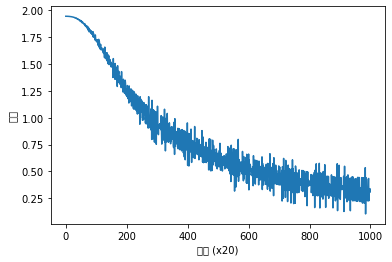

you [ 1.091  0.927  0.901 -1.646  0.908]
say [ 1.192 -1.18  -1.216 -0.326 -1.214]
goodbye [0.785 1.06  1.065 0.571 1.07 ]
and [ 0.276 -0.945 -1.016 -1.781 -0.984]
i [0.787 1.041 1.054 0.584 1.057]
hello [ 1.1    0.947  0.916 -1.646  0.923]
. [ 1.461 -1.063 -1.065  1.626 -1.11 ]


In [32]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

## word2vec 보충

### CBOW 모델과 확률

word2vec의 CBOW 모델은 수학적으로 다음과 같이 쓸 수 있다.

<img src="deep_learning_2_images/fig 3-22.png" width="50%" height="20%" /> 

이때 맥락으로 $W_{t-1}$와 $W_{t+1}$이 주어졌을 때 타깃이 $W_t$가 될 확률은 수식으로 다음과 같다.

$$P(W_t | W_{t-1},W_{t+1})$$

기존의 교차 엔트로피 오차식으로 부터 다음과 같은 식을 유도할 수 있다.

$$ L = -\log P(W_t | W_{t-1},W_{t+1})$$

이를 __음의 로그 가능도__라 부르며 말뭉치 전체로 확장하면 다음과 같이 된다. 이를 CBOW 모델의 손실함수로 사용하자.

$$ L = -{1 \over T}\sum_{t=1}^{T}\log P(W_t | W_{t-1},W_{t+1})$$



### skip-gram 모델

skip-gram모델은 CBOW에서 다루는 맥락과 타깃을 역전시킨 모델이다.

다음 그림을 보면 단번에 이해가 될 것이다.

<img src="deep_learning_2_images/fig 3-23.png" width="50%" height="20%" /> 

<img src="deep_learning_2_images/fig 3-24.png" width="50%" height="20%" /> 

하나의 입력에 대해 맥락의 수만큼 출력이 존재하고 각 출력에 대한 손실함수의 합을 최소화하는 방향으로 학습이 이루어진다.

확률은 CBOW와 반대로 다음과 같다.

$$P(W_{t-1},W_{t+1} | W_t)$$

각각의 단어가 조건부 독립이라는 가정 하에 다음과 같다.

$$P(W_{t-1},W_{t+1} | W_t) = P(W_{t-1}| W_t)P(W_{t+1}| W_t)$$ 

corpus 전체에 대한 skip-gram모델의 손실함수는 다음과 같다.

$$\begin{align*}L &=  -P(W_{t-1},W_{t+1} | W_t) \\ &=  P(W_{t-1}| W_t)P(W_{t+1}| W_t) \\ &=  -(\log P(W_{t-1}| W_t)+\log P(W_{t+1}| W_t))\end{align*}  $$

### 통계 기반 vs 추론 기반

두 기법에는 큰 차이가 있다. 

통계 기반 기법은 corpus의 전체 통계로부터 1회 학습하는 것이고 추론 기반 기법은 corpus의 일부분씩 여러 번보면서 학습하는 것이다.

만약 새로운 단어가 갱신되었을 때 통계 기반은 처음부터 다시 해야 되는데 추론 기반은 가중치만 다시 학습해주면 되므로 이런 점에서 추론 기반이 더 우세하다.

통계 기반은 주로 단어의 유사성이 인코딩되며 추론 기반은 한층 복잡한 단어 사이의 유추 문제도 풀 수 있다.

흔히 추론 기반이 통계 기반보다 좋다고 오해하지만 의외로 우열을 가릴 수 없다고 하다. 

## 이번 장에서 배운 내용

    * 추론 기반 기법은 추측하는 것이 목적이며, 그 부산물로 단어으이 분산 표현을 얻을 수 있다.
    
    * word2vec은 추론 기반 기법이며, 단순한 2층 신경망이다.
    
    * word2vec은 skip-gram 모델과 CBOW 모델을 제공한다.
    
    * CBOW 모델은 여러 단어(맥락)으로부터 하나의 단어(타깃)을 추축한다.
    
    * 반대로 skip-gram 모델은 하나의 단어(타깃)로부터 다수의 단어(맥락)를 추측한다.
    
    * word2vec은 가중치를 다시 학습할 수 있으므로, 단어의 분산 표현 갱신이안 새로운 단어 추가를 효율적으로 수행할 수 있다.

# Word2vec 속도 개선

앞에서 word2vec의 구조를 배우고 CBOW모델을 구현했다. 구현에는 몇 가지 문제가 있다. 

가장 큰 문제는 corpus에 포함된 어휘 수가 많아지면 계산량도 커진다는 점이다.

이번 장에서 두 가지 방법으로 속도 개선을 할 것이다.

첫 번째, Embedding이라는 새로운 계층을 도입한다.

두 번째, negative sampling이라는 새로운 손실 함수를 도입한다.

## word2vec 개선 (1)

어휘 수가 많아지면 다음의 두 계산에서 병목 현상이 일어난다.

1. 입력층의 원핫 표현과 가중치 행렬 $\textbf{W}_in$의 곱 계산 -- Embedding으로 해결
    
2. 은닉층과 가중치 행렬 $\textbf{W}_{out}$의 곱 및 Softmax 계층의 계산 -- Negative sampling으로 해결



### Embedding 계층

원핫벡터와 가중치 행렬을 곱하는 것이므로 결과적으로 수행하는 일은 단지 행렬의 특정 행을 추출하는 것뿐이다.

따라서 원핫표현으로의 변환과 MatMul 계층의 행렬 곱 계산은 사실 필요가 없다.

그래서 가중치 매개변수로부터 '단어 ID에 해당하는 행'을 추출하는 계층을 만들면 된다. 그 계층을 Embedding 계층이라 한다. 

### Embedding 계층 구현

그냥 원하는 행 인덱스로 불러오면 된다.

In [2]:
import numpy as np
W = np.arange(21).reshape(7,3)
idx = np.array([1, 0, 3, 0])

print (W[idx])

[[ 3  4  5]
 [ 0  1  2]
 [ 9 10 11]
 [ 0  1  2]]


In [7]:
class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zros_like(W)]
        self.idx = None
        
    def forward(self, idx):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out
    
    def backward(self, dout):
        dW = self.grads
        dW[...] = 0
        dW[self.idx] = dout # 나쁜 예
        return out
    
    
    
'''
여기에서는 가중치 W와 크기가 같은 행렬 dW를 만들고, dW의 특정 행에 기울기를 할당했다.

그러나 최종적으로 하고 시은 일은 가중치 W를 갱신하는 것이므로 일부러 dW와 같은 (W와 같은 크기의) 행렬을 만들 필요가 없다.

갱신하려는 행 번호(idx)와 그 기울기(dout)를 따라 저장해두면, 이 정보로부터 가중치(W)의 특정 행만 갱신할 수 있다.
'''

'\n여기에서는 가중치 W와 크기가 같은 행렬 dW를 만들고, dW의 특정 행에 기울기를 할당했다.\n\n그러나 최종적으로 하고 시은 일은 가중치 W를 갱신하는 것이므로 일부러 dW와 같은 (W와 같은 크기의) 행렬을 만들 필요가 없다.\n\n갱신하려는 행 번호(idx)와 그 기울기(dout)를 따라 저장해두면, 이 정보로부터 가중치(W)의 특정 행만 갱신할 수 있다.\n'

그러나 문제가 하나 있다. idx의 원소가 중복될 때 발생하는 문제이다. 

위의 그림과 같이 dh의 각 행 갓을 idx가 가리키는 장소에 할당해보자. 그러면 dW의 0번째 행에 2개의 값이 할당된다. 먼저 쓰여진 값이 사라진다.

이 중복 문제를 해결하기 위해 '할당'이 아닌 '더하기'를 해야 한다.

즉, dh의 각 행의 값을 dW의 해당 행에 더해주자. 

__<질문>__

왜 더해야 하는 걸까?

In [10]:
def backward(self, dout):
    dW = self.grads
    dw[...] = 0
    
    for i, word_id in enumerate(self.idx):
        dW[word_id] += dout[i]
        # 혹은
        # np.add.at(dW, self.idx, dout)
        # for문 보다 넘파이 내장함수를 쓰는 것이 훨씬 더 빠르다.
        
        return None

## word2vec 개선 (2)

이번에는 __Negative sampling__을 이용하여 은닉층의 뉴런과 가중치 행렬의 곱 그리고 Softmax 계층의 계산에서 발생하는 병목을 해결해보자!!

입력층$\cdot$은닉층 뉴런이 100만개 은닉층의 뉴런이 100개인 경우를 생각해보자.

앞 절에서 Embedding을 통해 입력층 계산을 향상시켰다. 계산지체를 일으키는 남은 부분이 2가지이다.

1. 은닉층의 뉴런과 가중치 행렬($\textbf{W}_{out}$)의 곱

2. Softmax 계층의 계산

### 다중 분류에서 이진 분류로

이 기법의 핵심은 '다중 분류'를 '이진 분류'로 근사하는 것이다.

아래의 사진과 같이 출력층에는 뉴런을 하나만 준비하면 된다.

<img src="./deep_learning_2_images/negative2.png"  width="50%" height="50%">

위에서 보듯이 출력층의 뉴런은 하나뿐이다. 따라서 은닉층과 출력 측의 가중치 행렬의 내적은 'say'에 해당하는 열만을 추출하고, 그 추출된 벡터와 

은닉층 뉴런과의 내적을 계산하면 끝이다.

이전까지의 출력층에서는 모든 단어를 대상으로 계산을 수행했지만, 여기에서는 하나의 단어에 주목하여 그 점수만을 게산하는 게 차이이다. 


그리고 시그모이드 함수를 이용하여 확률로 변환한다.

### 시그모이드 함수와 교차 엔트로피 오차

시그모이드 함수를 이용해 확률을 구하고 손실 함수로 '교차 엔트로피 오차'를 사용한다.

$$ L = -(t\log y + (1-t)log(1-y)) $$

y는 시그모이드 함수의 출력, t는 정답 레이블(1 or 0)

<img src="./deep_learning_2_images/negative4.png"  width="50%" height="50%">

### 다중 분류에서 이진 분류로

아래의 사진은 다중 분류를 수행하는 CBOW 모델이다.

<img src="./deep_learning_2_images/negative5.png"  width="50%" height="50%">

아래의 사진은 이진 분류를 수행하는 word2vec 모델이다.

<img src="./deep_learning_2_images/negative7.png"  width="50%" height="50%">

In [42]:
class EmbeddingDot:
    def __init__(self, W):
        self.embed = Embedding(W)
        self.params = self.embed.params
        self.grads = self.embed.grads
        self.cache = None
        

    def forward(self, h, idx):
        target_W = self.embed.forward(idx)
        out = np.sum(target_W * h, aixs=1)
        
        self.cache = (h, target_W)
        return out
    
    def backward(self, dout):
        h, target_W = self.cache
        dout = dout.reshape(dout.shape[0],1)
        
        dtarget_W = dout * h
        self.embed.backward(dtarget_W)
        dh = dout * target_W
        return dh

## 네거티브 샘플링

지금까지 배운 것으로 '다중 분류'에서 '이진 분류'로 변환할 수 있다. 그러나 이것만으로는 문제가 다 해결되지 않는다.

그러나 현재 긍정적인 예(정답)에 대해서만 학습했기 떄문에 오답을 입력하면 어떤 결과가 나올지 확실하지 않다.

우리가 정말 해야 하는 것은 정답에 대해서는 sigmoid 계층의 출력을 1에 가깝게 만들고, 오답에 대해서는 sigmoid 계층의 출력을 0에 가깝게 만드는 것이다. 

아래의 사진과 같다.

<img src="./deep_learning_2_images/negative10.png"  width="50%" height="50%">

모든 부정적 예를 대상으로 하여 이진 분류를 학습시키는 것은 불가능하다. 그래서 근사적인 해법으로, 적은 수의 부정적 예를 샘플링해 학습시킨다.

이것이 바로 'Negative sampling'기법이다. 

정리하면, negative sampling 기법은 긍정적 예를 타깃으로 한 경우의 손실을 구한다. 그와 동시에 부정적 예를 몇 개 샘플링하여 그에 대해서도 손실을 구한다. 그리고 각각의 데이터의 손실을 더한 값을 최종 손실로 한다.

아래의 사진이 negative sampling의 계산 그래프이다.

<img src="./deep_learning_2_images/negative11.png"  width="50%" height="50%">

### negative sampling의 sampling 기법

corpus에서 자주 등장하는 단어를 많이 추출하고 드물게 등장하는 단어를 적게 추출하는 것이다. 

1. corpus에서 각 단어의 출현 횟수를 구해 확률분포로 나타낸다.


2. 구한 확률분포에 따라서 샘플링을 수행한다.



In [16]:
import numpy as np

# 0에서 9까지의 숫자 중 하나를 무작위로 샘플링
print (np.random.choice(10))

# words에서 하나만 무작위로 샘플링
words = ['you', 'say', 'goodbye', 'I', 'hello', '.']
print (np.random.choice(words))

# 5개만 무작위로 샘플링(중복okay)
print (np.random.choice(words, size=5))

# 5개만 무작위로 샘플링(중복ㄴㄴ)
print (np.random.choice(words, size=5, replace=False))

# 확률분포에 따라 샘플링
p = [.5, .1, .05, .2, .05, .1]
print (np.random.choice(words, p=p))
 

3
.
['you' '.' '.' 'hello' 'goodbye']
['.' 'say' 'you' 'hello' 'I']
you


한 가지 수정해야 하는 부분이 있다.

$$P'(w_i) = {P(w_i)^{0.75} \over \sum_{j}^{n}P(w_j)^{0.75}}$$

위와 같이 확률 값에 1미만의 값을 제곱해줘야 한다. 그래야 원래 작았던 확률 값이 살짝 커져서 출현 확률이 낮은 단어도 버리지 않게 된다.

In [18]:
p = [.7, .29, .01]
new_p = np.power(p, .75)
new_p /= np.sum(new_p)
print (new_p)

[0.64196878 0.33150408 0.02652714]


In [21]:
corpus = np.array([0, 1, 2, 3, 4, 1, 2, 3])
power = 0.75
sample_size = 2

sampler = UnigramSampler(corpus, power, sample_size)
target = np.array([1, 3, 0])
negative_sample = sampler.get_negative_sample(target) 
print (negative_sample)

NameError: name 'UnigramSampler' is not defined

In [33]:
class NegativeSamplingLoss:
    def __init__(self, W, corpus, power=.75, sample_size=5):
        self.sample_size = sample_size
        self.sampler = UnigramSampler(corpus, power, sample_size)
        self.loss_layers = [SigmoidWithLoss() for _ in range(sample_size + 1)]
        self.embed_dot_layers = [EmbeddingDot(W) for _ in range(sample_size + 1)]
        self.params, self.grads = [], []
        
        for layer in self.embed_dot_layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def forward(self, h, target):
        batch_size = target.shape[0]
        negtive_sample = self.sample.get_negative_sample(target)
        
        # 긍정적 예 순전파
        score = self.embed_dot_layers[0].forward(h, target)
        correct_label = np.ones(batch_size, dtype=np.int32)
        loss = self.loss_layers[0].forward(score, correct_label)
        
        # 부정적 예 순전파
        negative_label = np.zeros(batch_size, dtype=np.int32)
        for i in range(self.sample_size):
            negative_target = negative_sample[:, i]
            score = self.embed_dot_layers[1 + i].forward(h, negative_target)
            loss += self.loss_layers[1 + i].forward(score, negative_label)
            
        return loss
    
    def backward(self, dout=1):
        dh = 0
        for 10, 11 in zip(self.loss_layers, self.embed_dot_layers):
            dscore = 10.backward(dout)
            dh += 11.backward(dscore)
            
        return dh

SyntaxError: invalid syntax (<ipython-input-33-282c7c279a14>, line 34)

## 개선판 word2vec 학습

### CBOW 모델 구현



In [41]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import Embedding
from ch04.negative_sampling_layer import NegativeSamplingLoss

class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(V, H).astype('f')
        
        # 계층 생성
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in) # embedding 계층 사용
            self.in_layers.append(layer)
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=.75, sample_size=5)
        
        # 모든 가중치와 기울기를 배열에 모은다.
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layers.params
            self.grads += layer.grads
            
        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)    
        loss = self.ns_loss.forward(h, target)
        return loss
    
    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout)
        return None   
    
    

In [34]:
### CBOW 모델 학습 코드

In [ ]:
import sys 
sys.path.append('..')
import numpy as np
from common import config
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from ch04.cbow import CBOW
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb

# 하이퍼파라미터 설정
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

# 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = t+gpu(contexts), to_gpu(target)
    
# 모델 등 생성
model = CBOW(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 학습 시작
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

# 나중에 사용할 수 있도록 필요한 데이터 저장
word_vecs = model.word_vecs
if config.GPU:
    words_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)


| 에폭 1 |  반복 1 / 9295 | 시간 0[s] | 손실 4.16
| 에폭 1 |  반복 21 / 9295 | 시간 5[s] | 손실 4.16
| 에폭 1 |  반복 41 / 9295 | 시간 10[s] | 손실 4.15
| 에폭 1 |  반복 61 / 9295 | 시간 14[s] | 손실 4.12
| 에폭 1 |  반복 81 / 9295 | 시간 19[s] | 손실 4.05
| 에폭 1 |  반복 101 / 9295 | 시간 24[s] | 손실 3.93
| 에폭 1 |  반복 121 / 9295 | 시간 28[s] | 손실 3.78
| 에폭 1 |  반복 141 / 9295 | 시간 33[s] | 손실 3.63
| 에폭 1 |  반복 161 / 9295 | 시간 40[s] | 손실 3.49
| 에폭 1 |  반복 181 / 9295 | 시간 45[s] | 손실 3.37
| 에폭 1 |  반복 201 / 9295 | 시간 50[s] | 손실 3.25
| 에폭 1 |  반복 221 / 9295 | 시간 55[s] | 손실 3.16
| 에폭 1 |  반복 241 / 9295 | 시간 60[s] | 손실 3.09
| 에폭 1 |  반복 261 / 9295 | 시간 65[s] | 손실 3.00
| 에폭 1 |  반복 281 / 9295 | 시간 69[s] | 손실 2.95
| 에폭 1 |  반복 301 / 9295 | 시간 75[s] | 손실 2.92
| 에폭 1 |  반복 321 / 9295 | 시간 80[s] | 손실 2.87
| 에폭 1 |  반복 341 / 9295 | 시간 85[s] | 손실 2.84
| 에폭 1 |  반복 361 / 9295 | 시간 90[s] | 손실 2.81
| 에폭 1 |  반복 381 / 9295 | 시간 96[s] | 손실 2.77
| 에폭 1 |  반복 401 / 9295 | 시간 101[s] | 손실 2.78
| 에폭 1 |  반복 421 / 9295 | 시간 106[s] | 손실 2.74
| 에폭 1 |  반복 441

| 에폭 1 |  반복 3521 / 9295 | 시간 872[s] | 손실 2.44
| 에폭 1 |  반복 3541 / 9295 | 시간 877[s] | 손실 2.43
| 에폭 1 |  반복 3561 / 9295 | 시간 882[s] | 손실 2.46
| 에폭 1 |  반복 3581 / 9295 | 시간 887[s] | 손실 2.39
| 에폭 1 |  반복 3601 / 9295 | 시간 892[s] | 손실 2.44
| 에폭 1 |  반복 3621 / 9295 | 시간 897[s] | 손실 2.39
| 에폭 1 |  반복 3641 / 9295 | 시간 901[s] | 손실 2.41
| 에폭 1 |  반복 3661 / 9295 | 시간 906[s] | 손실 2.40
| 에폭 1 |  반복 3681 / 9295 | 시간 911[s] | 손실 2.42
| 에폭 1 |  반복 3701 / 9295 | 시간 916[s] | 손실 2.42
| 에폭 1 |  반복 3721 / 9295 | 시간 921[s] | 손실 2.39
| 에폭 1 |  반복 3741 / 9295 | 시간 926[s] | 손실 2.41
| 에폭 1 |  반복 3761 / 9295 | 시간 931[s] | 손실 2.42
| 에폭 1 |  반복 3781 / 9295 | 시간 935[s] | 손실 2.45
| 에폭 1 |  반복 3801 / 9295 | 시간 940[s] | 손실 2.40
| 에폭 1 |  반복 3821 / 9295 | 시간 945[s] | 손실 2.39
| 에폭 1 |  반복 3841 / 9295 | 시간 950[s] | 손실 2.42
| 에폭 1 |  반복 3861 / 9295 | 시간 955[s] | 손실 2.46
| 에폭 1 |  반복 3881 / 9295 | 시간 960[s] | 손실 2.41
| 에폭 1 |  반복 3901 / 9295 | 시간 965[s] | 손실 2.39
| 에폭 1 |  반복 3921 / 9295 | 시간 970[s] | 손실 2.39
| 에폭 1 |  반복 

| 에폭 1 |  반복 6961 / 9295 | 시간 1704[s] | 손실 2.30
| 에폭 1 |  반복 6981 / 9295 | 시간 1709[s] | 손실 2.29
| 에폭 1 |  반복 7001 / 9295 | 시간 1713[s] | 손실 2.29
| 에폭 1 |  반복 7021 / 9295 | 시간 1718[s] | 손실 2.28
| 에폭 1 |  반복 7041 / 9295 | 시간 1723[s] | 손실 2.29
| 에폭 1 |  반복 7061 / 9295 | 시간 1728[s] | 손실 2.29
| 에폭 1 |  반복 7081 / 9295 | 시간 1733[s] | 손실 2.30
| 에폭 1 |  반복 7101 / 9295 | 시간 1737[s] | 손실 2.27
| 에폭 1 |  반복 7121 / 9295 | 시간 1742[s] | 손실 2.30
| 에폭 1 |  반복 7141 / 9295 | 시간 1747[s] | 손실 2.26
| 에폭 1 |  반복 7161 / 9295 | 시간 1752[s] | 손실 2.29
| 에폭 1 |  반복 7181 / 9295 | 시간 1756[s] | 손실 2.27
| 에폭 1 |  반복 7201 / 9295 | 시간 1761[s] | 손실 2.30
| 에폭 1 |  반복 7221 / 9295 | 시간 1766[s] | 손실 2.29
| 에폭 1 |  반복 7241 / 9295 | 시간 1771[s] | 손실 2.28
| 에폭 1 |  반복 7261 / 9295 | 시간 1776[s] | 손실 2.28
| 에폭 1 |  반복 7281 / 9295 | 시간 1780[s] | 손실 2.27
| 에폭 1 |  반복 7301 / 9295 | 시간 1785[s] | 손실 2.28
| 에폭 1 |  반복 7321 / 9295 | 시간 1790[s] | 손실 2.28
| 에폭 1 |  반복 7341 / 9295 | 시간 1795[s] | 손실 2.30
| 에폭 1 |  반복 7361 / 9295 | 시간 1800[s] | 

### CBOW 모델 평가

단어 몇개에 대해 거리가 가장 가까운 단어들을 뽑아보자!

In [35]:
# coding: utf-8
import sys
sys.path.append('..')
from common.util import most_similar, analogy
import pickle


pkl_file = 'cbow_params.pkl'
# pkl_file = 'skipgram_params.pkl'

with open(pkl_file, 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = params['id_to_word']

# 가장 비슷한(most similar) 단어 뽑기
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

# 유추(analogy) 작업
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)

FileNotFoundError: [Errno 2] No such file or directory: 'cbow_params.pkl'

## 이번 장에서 배운 내용

* Embedding 계층은 단어의 분산 표현을 담고 있으며, 순전파 시 지정한 단어 ID의 벡터를 추출한다.
    
* word2vec의 어휘 수의 증가엥 비례하여 계산량도 증가하므로, 근사치로 계산하는 빠른 기법을 사용하려면 좋다.
        
* negative sampling은 부정적 예를 몇 개 샘플링하는 기법으로, 이를 이용하면 다중 분류를 이진 분류처럼 취급할 수 있다.
        
* word2vec으로 얻은 단어의 분산 표현에는 단어의 의미가 녹아들어 있으며, 비슷한 맥락에서 사용되는 단어는 단어 벡터 공간에서 가까이           위치한다.
        
* word2vec의 단어의 분산 표현을 이용하면 유추 문제를 벡터의 덧셈과 뺄셈으로 풀 수 있게 된다.
        
* word2vec은 전이학습측면에서 특히 중요하며, 그 단엉의 분산 표현은 다양한 자연어 처리 작업에 이용할 수 있다.